In [10]:
import pandas as pd

# Load the training and test datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display the first few rows of the training dataset
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numerical in training data
label_encoder = LabelEncoder()
for column in train_data.select_dtypes(include=['object']).columns:
    train_data[column] = label_encoder.fit_transform(train_data[column])

# Convert categorical columns to numerical in test data
for column in test_data.select_dtypes(include=['object']).columns:
    test_data[column] = label_encoder.fit_transform(test_data[column])


In [12]:
# Check for null values in the training data
print(train_data.isnull().sum())

# Fill missing values with the mean for numerical columns in training data
train_data.fillna(train_data.mean(), inplace=True)

# For categorical columns, fill with the mode in training data
for column in train_data.select_dtypes(include=['object']).columns:
    train_data[column].fillna(train_data[column].mode()[0], inplace=True)

# Do the same for the test data
test_data.fillna(test_data.mean(), inplace=True)
for column in test_data.select_dtypes(include=['object']).columns:
    test_data[column].fillna(test_data[column].mode()[0], inplace=True)
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [13]:
import numpy as np

# Function to replace outliers with the mean
def replace_outliers(df):
    for column in df.select_dtypes(include=[np.number]).columns:
        mean = df[column].mean()
        std = df[column].std()
        threshold = 3 * std
        outliers = (df[column] - mean).abs() > threshold
        df.loc[outliers, column] = mean
    return df

# Replace outliers in the training data
train_data = replace_outliers(train_data)

# Replace outliers in the test data
test_data = replace_outliers(test_data)


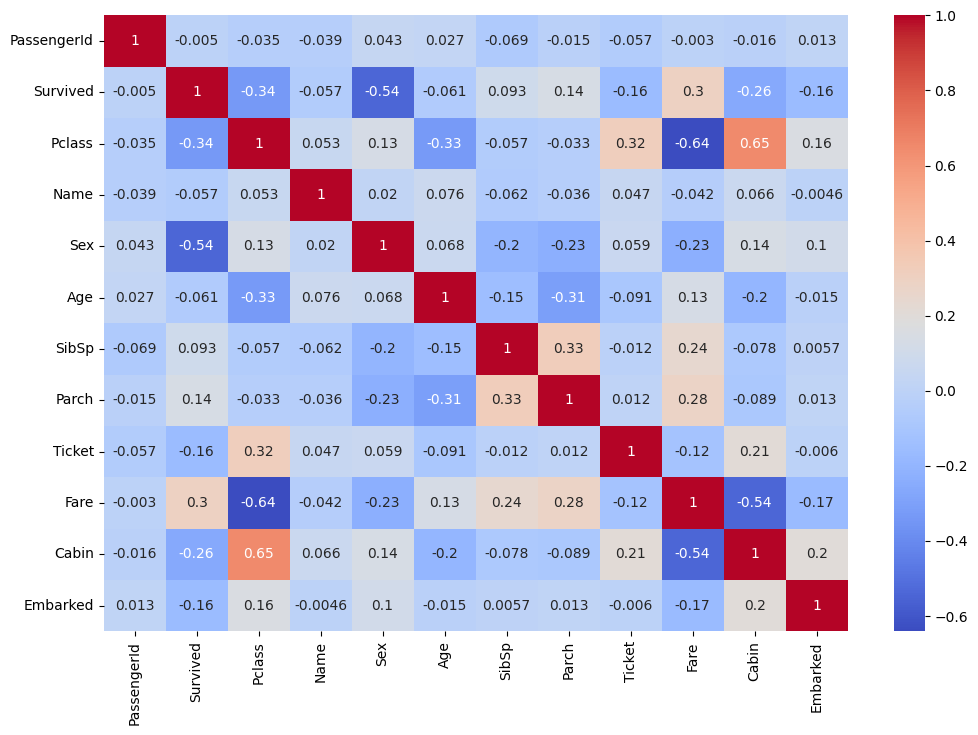

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for training data
correlation_matrix = train_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


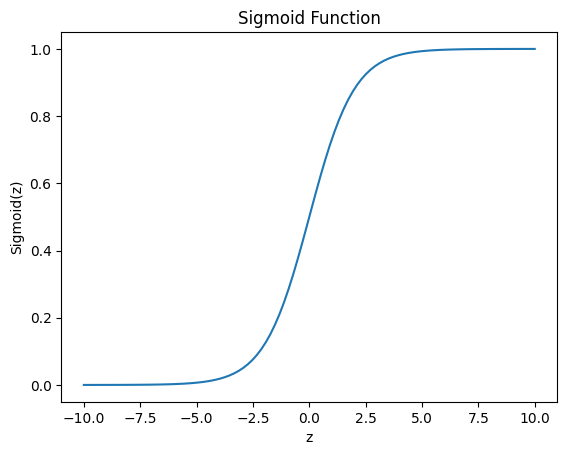

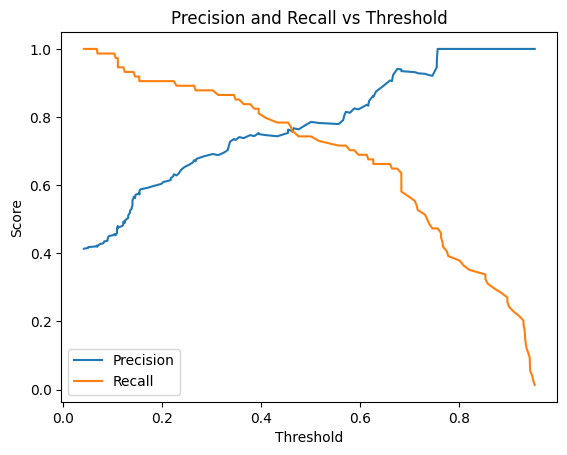

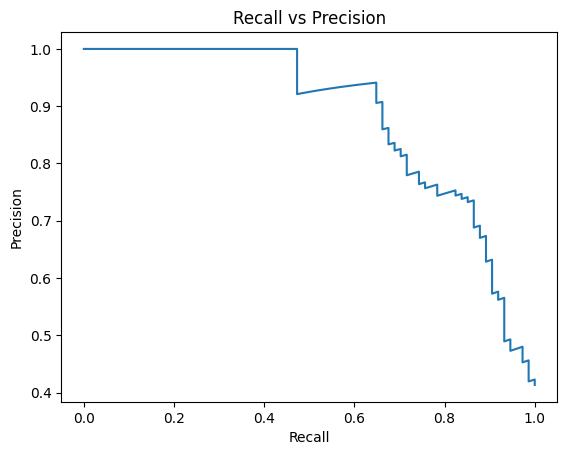

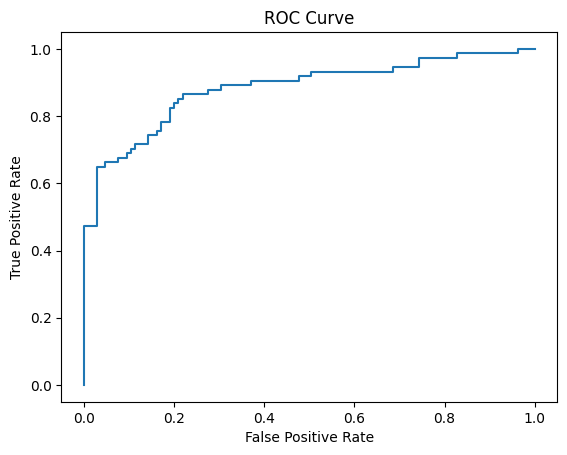

Confusion Matrix:
 [[90 15]
 [19 55]]
Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Load the Titanic dataset
data = pd.read_csv('train.csv')

# Data preprocessing (simplified for demonstration purposes)
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna('S', inplace=True)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
X = data[features]
y = data['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# Sigmoid Function Visualization
z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))
plt.plot(z, sigmoid)
plt.title('Sigmoid Function')
plt.xlabel('z')
plt.ylabel('Sigmoid(z)')
plt.show()

# Precision-Recall vs Threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.title('Precision and Recall vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

# Recall vs Precision Curve
plt.plot(recall, precision)
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# ROC Curve
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision_score_val = precision_score(y_test, y_pred)
recall_score_val = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision_score_val}')
print(f'Recall: {recall_score_val}')
print(f'F1 Score: {f1}')


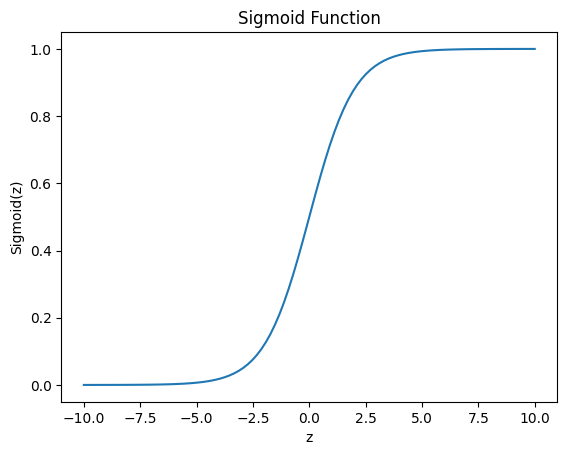

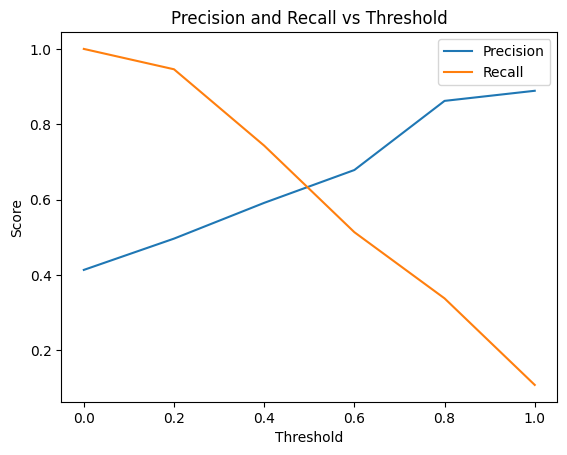

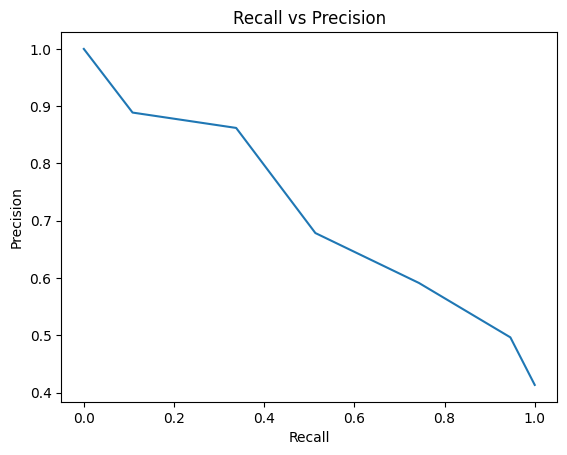

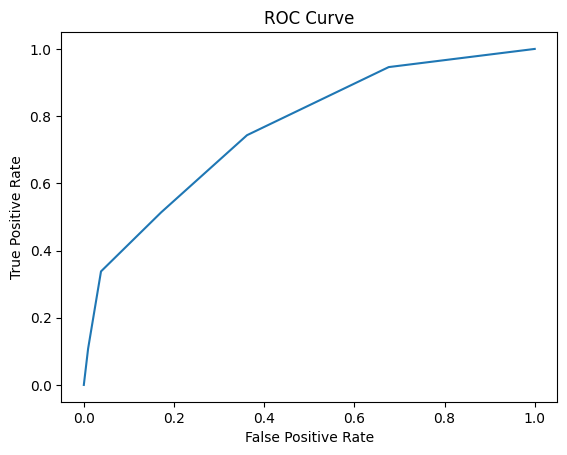

Confusion Matrix:
 [[87 18]
 [36 38]]
Accuracy: 0.6983240223463687
Precision: 0.6785714285714286
Recall: 0.5135135135135135
F1 Score: 0.5846153846153848


In [18]:
# Train k-Nearest Neighbors model
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred_prob = knn.predict_proba(X_test)[:, 1]
y_pred = knn.predict(X_test)

# Sigmoid Function Visualization
z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))
plt.plot(z, sigmoid)
plt.title('Sigmoid Function')
plt.xlabel('z')
plt.ylabel('Sigmoid(z)')
plt.show()

# Precision-Recall vs Threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.title('Precision and Recall vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

# Recall vs Precision Curve
plt.plot(recall, precision)
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# ROC Curve
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision_score_val = precision_score(y_test, y_pred)
recall_score_val = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision_score_val}')
print(f'Recall: {recall_score_val}')
print(f'F1 Score: {f1}')


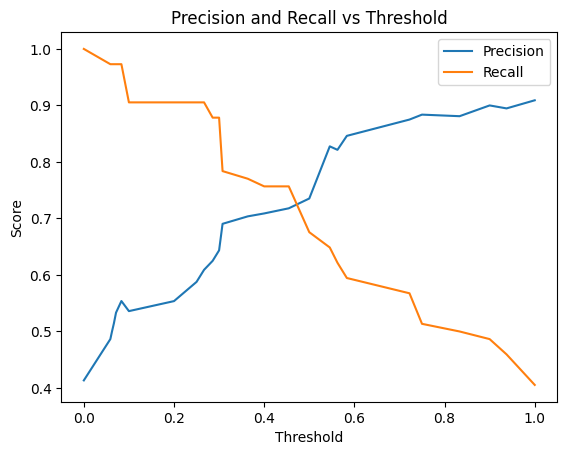

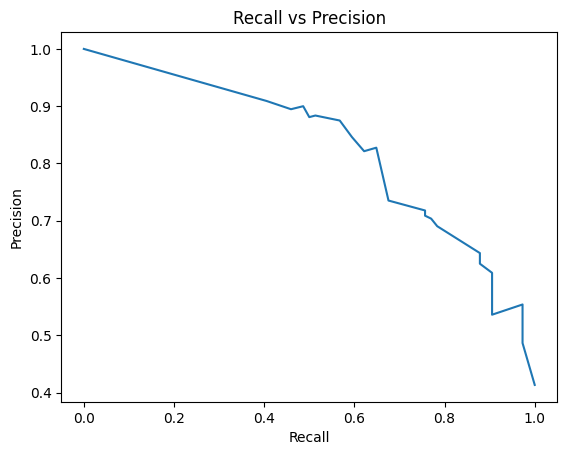

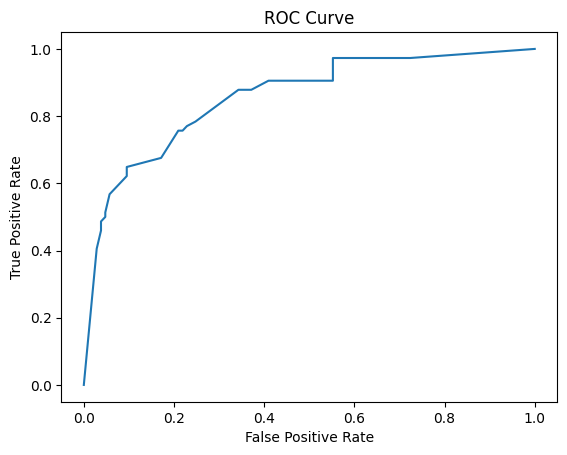

Confusion Matrix:
 [[95 10]
 [26 48]]
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Accuracy: 0.7988826815642458
Precision: 0.8275862068965517
Recall: 0.6486486486486487
F1 Score: 0.7272727272727273


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve, roc_curve, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Load the Titanic dataset
data = pd.read_csv('train.csv')

# Data preprocessing (simplified for demonstration purposes)
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna('S', inplace=True)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
X = data[features]
y = data['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict probabilities and class labels
y_pred_prob = best_model.predict_proba(X_test)[:, 1]
y_pred = best_model.predict(X_test)

# Precision-Recall vs Threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.title('Precision and Recall vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

# Recall vs Precision Curve
plt.plot(recall, precision)
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# ROC Curve
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision_score_val = precision_score(y_test, y_pred)
recall_score_val = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision_score_val}')
print(f'Recall: {recall_score_val}')
print(f'F1 Score: {f1}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

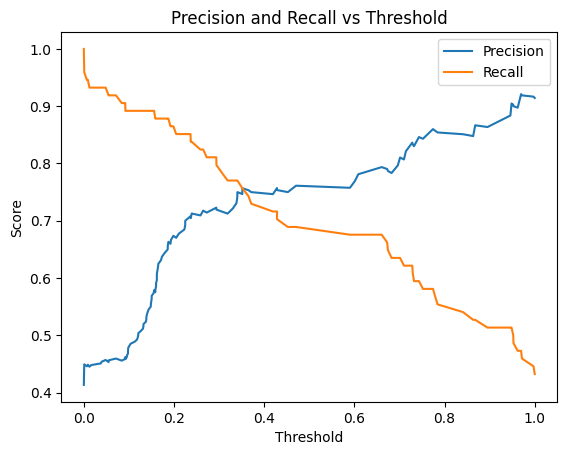

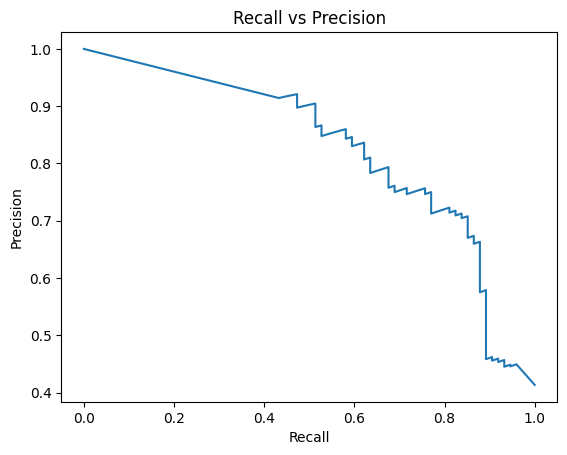

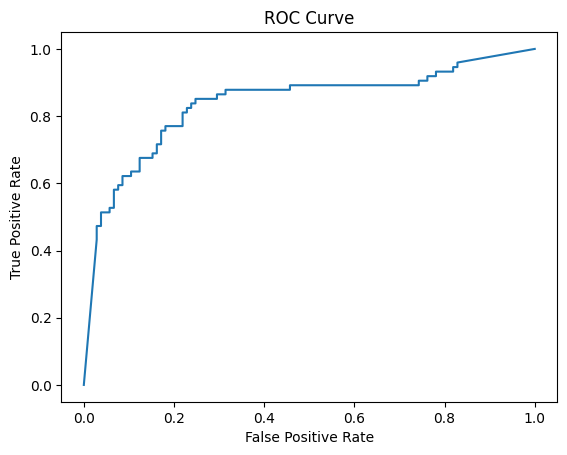

Confusion Matrix:
 [[89 16]
 [24 50]]
Best Parameters: {'alpha': 0.1, 'eta0': 0.001, 'learning_rate': 'adaptive', 'loss': 'modified_huber', 'penalty': 'elasticnet'}
Accuracy: 0.776536312849162
Precision: 0.7575757575757576
Recall: 0.6756756756756757
F1 Score: 0.7142857142857142


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_recall_curve, roc_curve, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Load the Titanic dataset
data = pd.read_csv('train.csv')

# Data preprocessing (simplified for demonstration purposes)
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna('S', inplace=True)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
X = data[features]
y = data['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for SGDClassifier
param_grid = {
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.001, 0.01, 0.1, 1]
}

grid_search = GridSearchCV(SGDClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict probabilities and class labels
y_pred_prob = best_model.predict_proba(X_test)[:, 1]
y_pred = best_model.predict(X_test)

# Precision-Recall vs Threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.title('Precision and Recall vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

# Recall vs Precision Curve
plt.plot(recall, precision)
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# ROC Curve
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision_score_val = precision_score(y_test, y_pred)
recall_score_val = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision_score_val}')
print(f'Recall: {recall_score_val}')
print(f'F1 Score: {f1}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

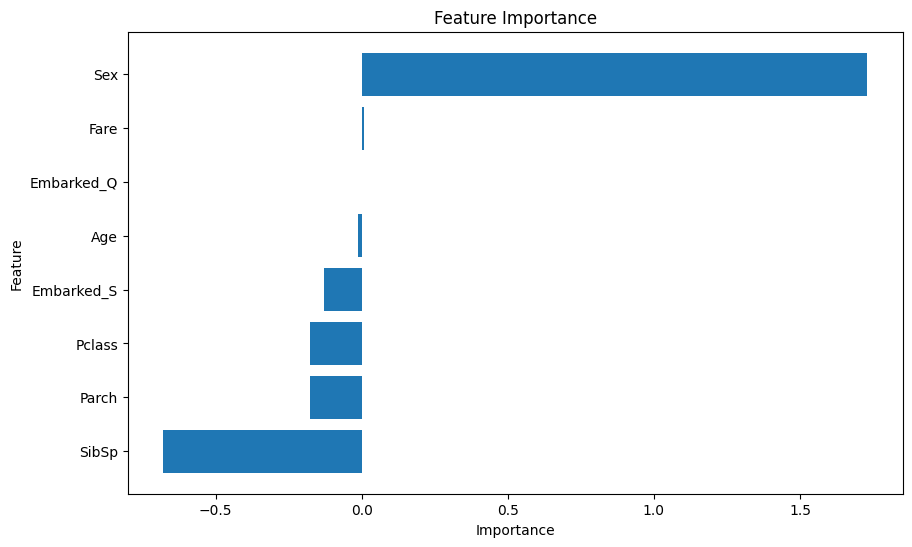

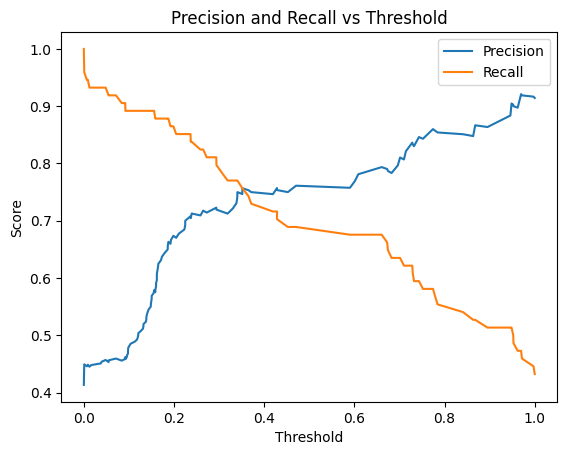

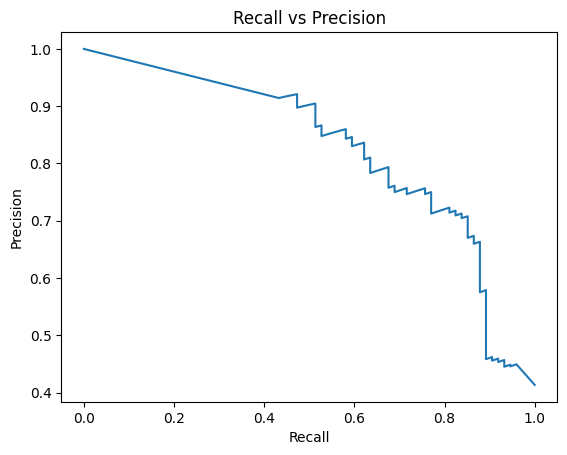

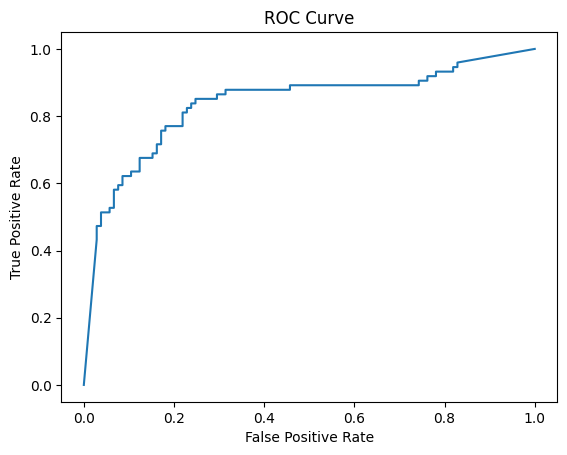

Confusion Matrix:
 [[89 16]
 [24 50]]
Best Parameters: {'alpha': 0.1, 'eta0': 0.001, 'learning_rate': 'adaptive', 'loss': 'modified_huber', 'penalty': 'elasticnet'}
Accuracy: 0.776536312849162
Precision: 0.7575757575757576
Recall: 0.6756756756756757
F1 Score: 0.7142857142857142


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_recall_curve, roc_curve, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Load the Titanic dataset
data = pd.read_csv('train.csv')

# Data preprocessing (simplified for demonstration purposes)
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna('S', inplace=True)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
X = data[features]
y = data['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for SGDClassifier
param_grid = {
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.001, 0.01, 0.1, 1]
}

grid_search = GridSearchCV(SGDClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict probabilities and class labels
y_pred_prob = best_model.predict_proba(X_test)[:, 1]
y_pred = best_model.predict(X_test)

# Feature importance (coefficients)
feature_importance = best_model.coef_[0]
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# Precision-Recall vs Threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.title('Precision and Recall vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

# Recall vs Precision Curve
plt.plot(recall, precision)
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# ROC Curve
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision_score_val = precision_score(y_test, y_pred)
recall_score_val = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision_score_val}')
print(f'Recall: {recall_score_val}')
print(f'F1 Score: {f1}')


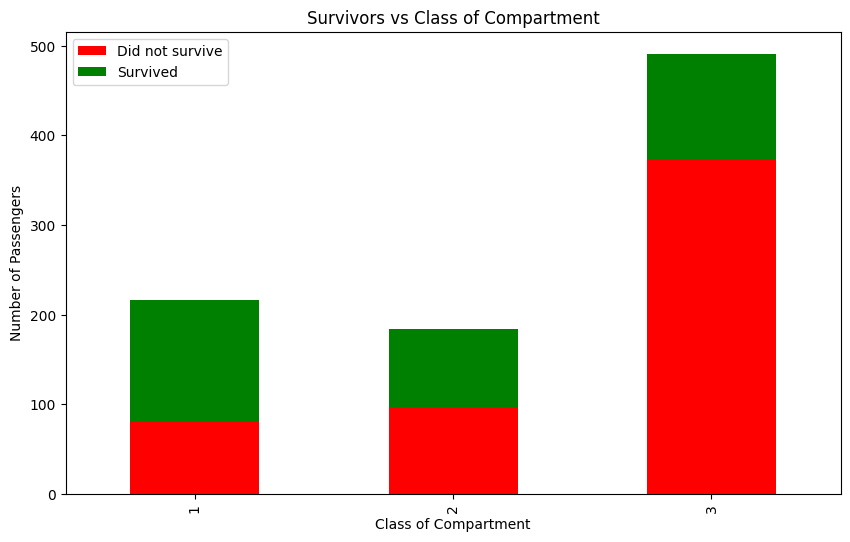

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset
data = pd.read_csv('train.csv')

# Data preprocessing (simplified for demonstration purposes)
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna('S', inplace=True)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
X = data[features]
y = data['Survived']

# Group by Pclass and calculate the number of survivors and non-survivors
survivors_vs_class = data.groupby('Pclass')['Survived'].value_counts().unstack()

# Plot the data
survivors_vs_class.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(10, 6))
plt.title('Survivors vs Class of Compartment')
plt.xlabel('Class of Compartment')
plt.ylabel('Number of Passengers')
plt.legend(['Did not survive', 'Survived'])
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

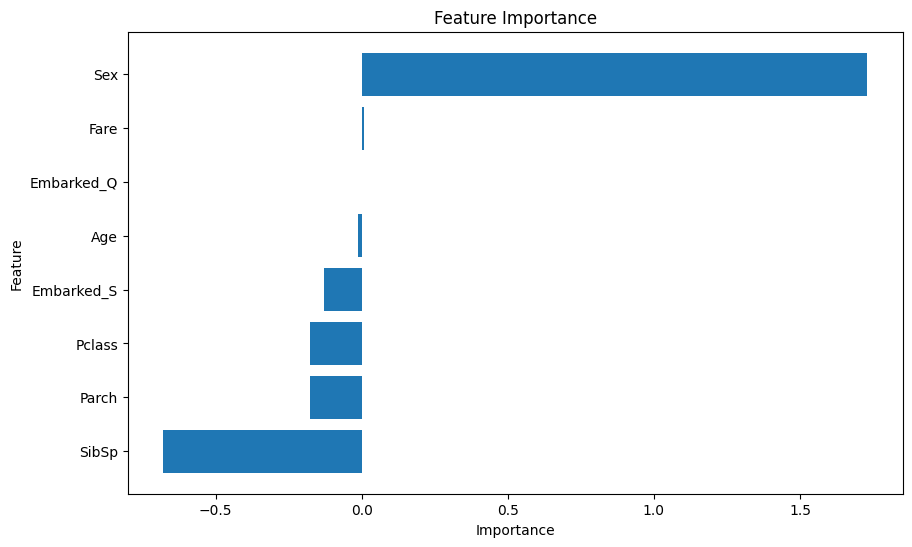

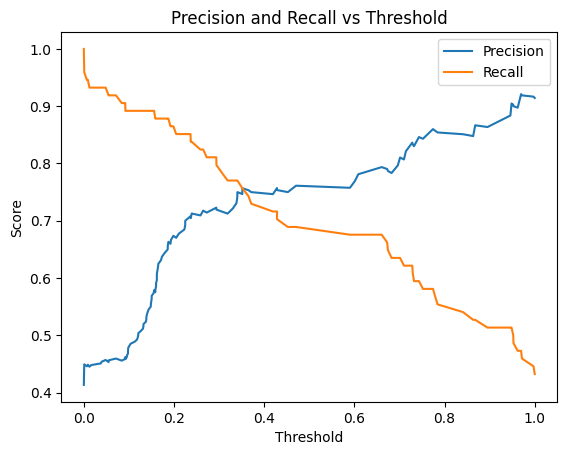

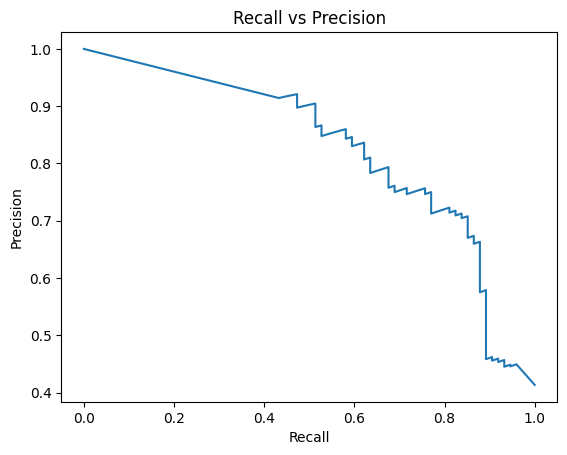

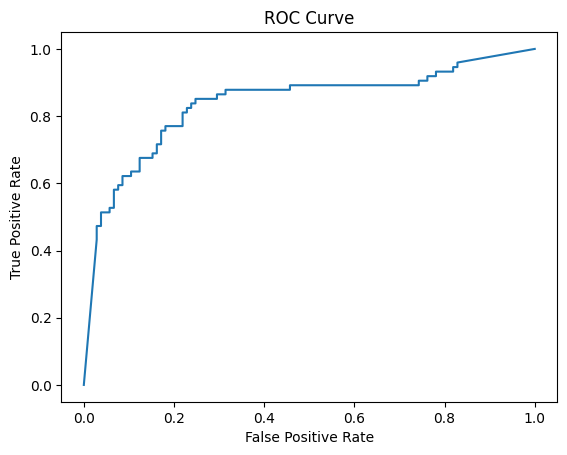

Confusion Matrix:
 [[89 16]
 [24 50]]
Best Parameters: {'alpha': 0.1, 'eta0': 0.001, 'learning_rate': 'adaptive', 'loss': 'modified_huber', 'penalty': 'elasticnet'}
Accuracy: 0.776536312849162
Precision: 0.7575757575757576
Recall: 0.6756756756756757
F1 Score: 0.7142857142857142

Conclusion:
The SGD classifier with hyperparameters {'alpha': 0.1, 'eta0': 0.001, 'learning_rate': 'adaptive', 'loss': 'modified_huber', 'penalty': 'elasticnet'} achieves an accuracy of 0.78.
The precision and recall scores are 0.76 and 0.68, respectively, resulting in an F1 score of 0.71.
The feature importance plot indicates which features contribute most to the predictions, providing insights into the factors that influence survival on the Titanic.


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_recall_curve, roc_curve, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Load the Titanic dataset
data = pd.read_csv('train.csv')

# Data preprocessing
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna('S', inplace=True)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
X = data[features]
y = data['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for SGDClassifier
param_grid = {
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.001, 0.01, 0.1, 1]
}

grid_search = GridSearchCV(SGDClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict probabilities and class labels
y_pred_prob = best_model.predict_proba(X_test)[:, 1]
y_pred = best_model.predict(X_test)

# Feature importance (coefficients)
feature_importance = best_model.coef_[0]
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# Precision-Recall vs Threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.title('Precision and Recall vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

# Recall vs Precision Curve
plt.plot(recall, precision)
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# ROC Curve
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision_score_val = precision_score(y_test, y_pred)
recall_score_val = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision_score_val}')
print(f'Recall: {recall_score_val}')
print(f'F1 Score: {f1}')

# Conclusion
print("\nConclusion:")
print(f"The SGD classifier with hyperparameters {best_params} achieves an accuracy of {accuracy:.2f}.")
print(f"The precision and recall scores are {precision_score_val:.2f} and {recall_score_val:.2f}, respectively, resulting in an F1 score of {f1:.2f}.")
print("The feature importance plot indicates which features contribute most to the predictions, providing insights into the factors that influence survival on the Titanic.")


In [26]:
data['Family_Size'] = data['SibSp'] + data['Parch']
data['Is_Alone'] = (data['Family_Size'] == 0).astype(int)
data['Age_Child'] = (data['Age'] < 18).astype(int)

# Add new features to the feature set
features += ['Family_Size', 'Is_Alone', 'Age_Child']
X = data[features]


In [27]:
from sklearn.ensemble import RandomForestClassifier

# Create and fit the RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy}')


Random Forest Accuracy: 0.7988826815642458


In [28]:
param_grid = {
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.0001, 0.001, 0.01, 0.1, 1]
}

grid_search = GridSearchCV(SGDClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

Best Parameters: {'alpha': 0.1, 'eta0': 0.001, 'learning_rate': 'adaptive', 'loss': 'modified_huber', 'penalty': 'elasticnet'}


In [29]:
from sklearn.impute import KNNImputer

# Apply KNN imputation
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)

# Re-split and fit the model
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


In [30]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Re-split and fit the model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [32]:
import pandas as pd

# Load the Titanic dataset
data = pd.read_csv('train.csv')

# Print column names to verify
print("Columns in the dataset:", data.columns.tolist())

# Check if 'Embarked' column exists
if 'Embarked' in data.columns:
    # Proceed with preprocessing if the column is present
    data['Age'].fillna(data['Age'].median(), inplace=True)
    data['Embarked'].fillna('S', inplace=True)
    data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
    data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)
else:
    print("'Embarked' column is missing in the dataset.")
    # Handle the missing 'Embarked' column appropriately or modify preprocessing

# Define features and target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'] + [col for col in data.columns if col.startswith('Embarked_')]
X = data[features]
y = data['Survived']

# Ensure that all necessary columns are present in the DataFrame
print("Features in the dataset:", X.columns.tolist())
print("Target variable in the dataset:", 'Survived' in data.columns)

# Proceed with model training and evaluation as previously defined


Columns in the dataset: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Features in the dataset: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
Target variable in the dataset: True
